<a href="https://colab.research.google.com/github/inocentejr/CODE7_IFSP_SLT/blob/main/Aula%201/Simulacao_Motor_DC_PID_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Simulação de Motor DC com Python

##Instalação de Módulos Adicionais

O módulo control não se encontra instalado por padrão no colab.



In [1]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 10.3 MB/s eta 0:00:00


## Carregamento dos módulos necessários

Para rodar este programa precisaremos dos módulos:

- control
- plotly.express
- matplotlib.pyplot

In [2]:
import control
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

# Modelagem do Motor

A simulação do sistema dinâmico utiliza funções muito parecidas com as do Control Toolbox do MATLAB.

In [3]:
## Parâmetros físicos do motor

Kv = 0.2523
Kt = Kv
Ra = 6.76 #Resistência elétrica da armadura [Ohm]
La = 3e-3 #Indutância da armadura [H]
b = 0.0011 #Atrito viscoso do rotor [Nms]
J = 0.5*b #Inércia do rotor [kgm²/s²]

## Função de Transferência
s = control.tf('s') 
G = Kt/((J*s+b)*(Ra+La*s)+Kv*Kt)
G

TransferFunction(array([0.2523]), array([1.650000e-06, 3.721300e-03, 7.109129e-02]))

## Resposta ao Degrau da Planta

In [4]:
t,y = control.step_response(G)

## Plot dos resultados utilizando o módulo plotly.express

In [5]:
fig = px.line(x=t,y=y,title='Resposta ao Degrau do Motor CC')
fig = fig.update_layout(xaxis_title='Tempo [s]',yaxis_title = 'Velocidade Angular [rad/s]')
fig.show()

## Plot dos resultados utilizando o módulo matplotlib.pyplot

Text(0.5, 0.98, 'Resposta ao Degrau')

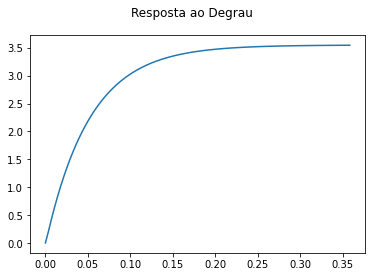

In [6]:
fig,ax = plt.subplots()
ax.plot(t,y)
fig.suptitle('Resposta ao Degrau')

# Modelagem do Controlador PID

In [8]:
## Controlador
Kp = 1
Ki = 0
Kd = 0

K = Kp+1/s*Ki+s*Kd
K

TransferFunction(array([1.]), array([1.]))

# Sistema em Malha Fechada

In [9]:
T = control.feedback(K*G,1)
T

TransferFunction(array([0.2523]), array([1.6500000e-06, 3.7213000e-03, 3.2339129e-01]))

## Resposta ao Degrau do Sistema em Malha Fechada

In [18]:
t=np.linspace(0,1,1000,endpoint=False)
r = np.zeros(t.shape)
r[250:500]=5
r[500:750]=10
r[750:]=5

px.line(x=t,y=r,title='Sinal de Referência')

In [23]:
t2,y2 = control.forced_response(T,t,r)

fig = px.line(x=t2,y=[r,y2],title = 'Resposta em Malha Fechada')
fig.update_layout(hovermode="x")
fig.update_traces(hovertemplate=None)

series_names = ["r(t)", "y(t)"]
for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    #fig.data[idx].hovertemplate = name
fig.show()